In [18]:
# notebook for lab #1: Cosmic Ray Muons

# import libraries:

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import scipy as sp

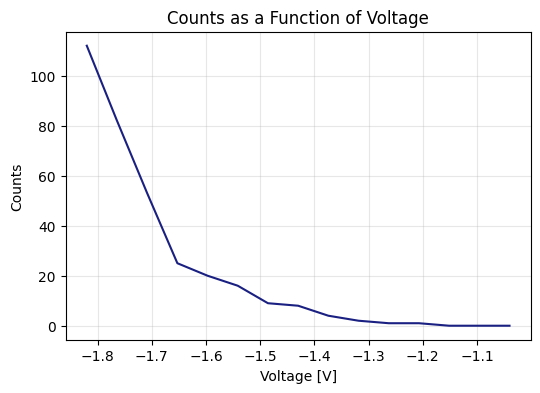

In [19]:
# individually plateauing top detector:

# time interval:
T_platt = 30 #s

# data:
volts_platt = np.array([13.8, 16, 18, 19, 19.5, 20, 20.5, 21, 21.5, 22, 22.5, 23,23.5, 24, 24.3])

counts_platt = np.array([0,0,0,1,1,2,4,8,9,16,20,25,53,82,112])
volts_plat = np.linspace(-1.04, -1.82, len(volts_platt))
               
# plots the data:
ff, (ax1) = plt.subplots(1, 1)
ff.set_figwidth(6)
ff.set_figheight(4)

# log of :
ax1.plot(volts_plat, (counts_platt), color='#1a2081')#, label=r"$H_4(\omega)$")
ax1.set_title("Counts as a Function of Voltage")
ax1.set_xlabel(r"Voltage [V]")
ax1.set_ylabel(r"Counts" )
#ax1.set_xlim(14,22)
#ax1.set_ylim(0,20)
#ax1.legend()
ax1.grid(True, alpha=0.3)
               
               

In [20]:
# new trial on October 5th:

v_midbot3 = np.array([-1.0,-1.11,-1.21,-1.31,-1.39,-1.50,-1.55,-1.60,-1.65,-1.70,-1.75,-1.80,-1.82])
c_midbot3 = np.array([0,0,0,0,1,11,22,47,62,70,73,74,73])

v_botmid = np.array([-0.97,-1.12,-1.22,-1.30,-1.40,-1.50,-1.60,-1.65,-1.70,-1.75,-1.80])
c_botmid = np.array([0,0,0,4,24,58,67,73,77,79,76])

v_topbot = np.array([-1.04, -1.15, -1.30, -1.40, -1.50, -1.55, -1.60,-1.65,-1.70,-1.75, -1.80,-1.85,-1.91])
c_topbot = np.array([0,0,2,17,53,60,62,59,59,62,60,60,67])

v_bottop = np.array([-1.01,-1.15,-1.30,-1.35,-1.40,-1.45,-1.50,-1.55,-1.60,-1.65,-1.70,-1.75,-1.80])
c_bottop = np.array([0,0,3,6,15,22,37,53,66,67,66,64,72])

v_topmid = np.array([-1.04,-1.20,-1.30,-1.35,-1.40,-1.45,-1.50,-1.55,-1.60,-1.65,-1.70,-1.75,-1.80,-1.85,-1.90,-1.91])
c_topmid = np.array([0,1,7,19,27,49,72,87,93,88,84,91,92,96,98,99])

v_midtop = np.array([-1.01,-1.20,-1.30,-1.40,-1.45,-1.50,-1.55,-1.60,-1.65,-1.70,-1.75,-1.80,-1.83])
c_midtop = np.array([0,0,0,5,11,23,32,48,67,71,80,78,84])
    

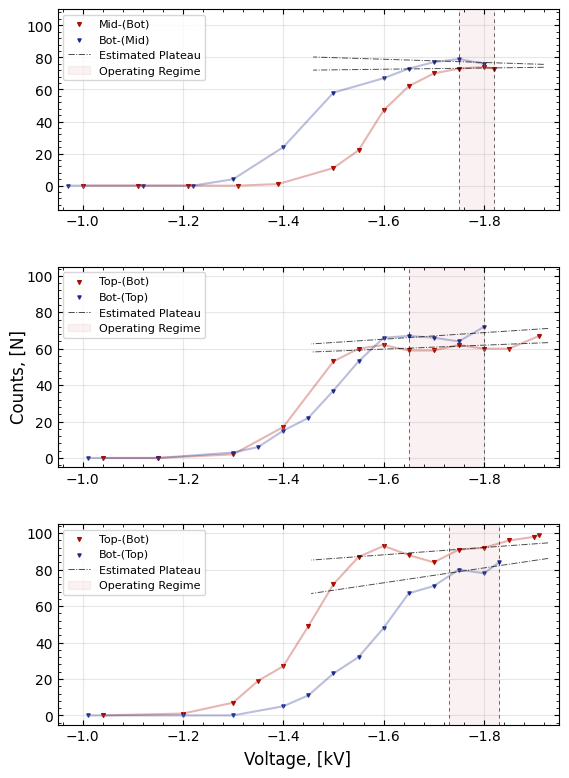

In [23]:
# plots the data:

# style:
plt.style.use('default')


ff, (ax1,ax2,ax3) = plt.subplots(3,1)
ff.set_figwidth(6)
ff.set_figheight(8)
ff.tight_layout(pad=2)

n = 10
mb_fit = np.polyfit(v_midbot3[n:],c_midbot3[n:],1)
bm_fit = np.polyfit(v_botmid[8:],c_botmid[8:],1)
x_vals = np.linspace(min(v_midbot3)-1, max(v_midbot3), 100)

tb_fit = np.polyfit(v_topbot[5:],c_topbot[5:],1)
bt_fit = np.polyfit(v_bottop[8:],c_bottop[8:],1)
x_vals_tb = np.linspace(min(v_topbot)-1, max(v_topbot), 100)



tm_fit = np.polyfit(v_topmid[7:-2],c_topmid[7:-2],1)
mt_fit = np.polyfit(v_midtop[10:],c_midtop[10:],1)

x_vals_mt = np.linspace(min(v_topmid)-1, max(v_topmid), 100)



ax1.scatter(v_midbot3,c_midbot3,marker='v', label="Mid-(Bot)", s=7, c='#ad0d02')
ax1.scatter(v_botmid,c_botmid, marker='v',label="Bot-(Mid)", s=5,c='#1c2b8f')
ax1.plot(v_botmid,c_botmid,c='#1c2b8f',alpha=0.3)
ax1.plot(v_midbot3,c_midbot3,c='#ad0d02', alpha=0.3)
ax1.plot(x_vals[49:75],mb_fit[0]*x_vals[49:75]+mb_fit[1],c='k', linestyle='-.',linewidth=0.7, alpha=0.7 , label='Estimated Plateau')
ax1.plot(x_vals[49:75],bm_fit[0]*x_vals[49:75]+bm_fit[1],c='k', linestyle='-.',linewidth=0.7, alpha=0.7 )
ax1.axvline(min(v_midbot3), alpha=0.8, c='k', linestyle=(0,(5,5)), linewidth=0.5)
ax1.axvline(-1.75, alpha=0.8, c='k', linestyle=(0,(5,5)), linewidth=0.5)
ax1.axvspan(-1.75, min(v_midbot3), alpha=0.05, color='#ad0d02', label='Operating Regime')

ax2.scatter(v_topbot,c_topbot,marker='v',label="Top-(Bot)", s=7, c='#ad0d02')
ax2.scatter(v_bottop,c_bottop, marker='v',label="Bot-(Top)", s=5,c='#1c2b8f')
ax2.plot(v_topbot,c_topbot,c='#ad0d02',alpha=0.3)
ax2.plot(v_bottop,c_bottop,c='#1c2b8f', alpha=0.3)
ax2.plot(x_vals_tb[52:78],tb_fit[0]*x_vals_tb[52:78]+tb_fit[1],c='k', linestyle='-.',linewidth=0.7, alpha=0.7 , label='Estimated Plateau')
ax2.plot(x_vals_tb[52:78],bt_fit[0]*x_vals_tb[52:78]+bt_fit[1],c='k', linestyle='-.',linewidth=0.7, alpha=0.7 )
ax2.axvline(min(v_bottop), alpha=0.8, c='k', linestyle=(0,(5,5)), linewidth=0.5)
ax2.axvline(-1.65, alpha=0.8, c='k', linestyle=(0,(5,5)), linewidth=0.5)
ax2.axvspan(-1.65, min(v_bottop), alpha=0.05, color='#ad0d02', label='Operating Regime')

ax3.scatter(v_topmid,c_topmid,marker='v',label="Top-(Bot)", s=7, c='#ad0d02')
ax3.scatter(v_midtop,c_midtop, marker='v',label="Bot-(Top)", s=5,c='#1c2b8f')
ax3.plot(v_topmid,c_topmid,c='#ad0d02',alpha=0.3)
ax3.plot(v_midtop,c_midtop,c='#1c2b8f', alpha=0.3)
ax3.plot(x_vals_mt[52:78],tm_fit[0]*x_vals_mt[52:78]+tm_fit[1],c='k', linestyle='-.',linewidth=0.7, alpha=0.7 , label='Estimated Plateau')
ax3.plot(x_vals_mt[52:78],mt_fit[0]*x_vals_mt[52:78]+mt_fit[1],c='k', linestyle='-.',linewidth=0.7, alpha=0.7 )
ax3.axvline(min(v_midtop), alpha=0.8, c='k', linestyle=(0,(5,5)), linewidth=0.5)
ax3.axvline(-1.73, alpha=0.8, c='k', linestyle=(0,(5,5)), linewidth=0.5)
ax3.axvspan(-1.73, min(v_midtop), alpha=0.05, color='#ad0d02', label='Operating Regime')






ax1.invert_xaxis()
ax2.invert_xaxis()
ax3.invert_xaxis()

ax1.legend(loc='upper left',prop={'size': 8})
ax2.legend(loc='upper left',prop={'size': 8})
ax3.legend(loc='upper left',prop={'size': 8})

ax1.grid(True, alpha=0.3)
ax2.grid(True, alpha=0.3)
ax3.grid(True, alpha=0.3)

#ff.suptitle('Counts as a function of Voltage for Each Detector')
ff.supxlabel('Voltage, [kV]')
ff.supylabel('Counts, [N]')

ax1.set_xlim(-0.95, -1.95)
ax2.set_xlim(-0.95, -1.95)
ax3.set_xlim(-0.95, -1.95)

ax1.set_ylim(-15, 110)
ax2.set_ylim(-5, 105)
ax3.set_ylim(-5, 105)






ax1.xaxis.set_major_locator(MultipleLocator(0.2))
ax1.xaxis.set_minor_locator(MultipleLocator(0.04))
ax1.yaxis.set_minor_locator(MultipleLocator(4))
ax1.yaxis.set_major_locator(MultipleLocator(20))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')

ax2.xaxis.set_major_locator(MultipleLocator(0.2))
ax2.xaxis.set_minor_locator(MultipleLocator(0.04))
ax2.yaxis.set_minor_locator(MultipleLocator(4))
ax2.yaxis.set_major_locator(MultipleLocator(20))
ax2.tick_params(axis='both', direction="in")
ax2.tick_params(which="minor", axis="x", direction="in")
ax2.tick_params(which="minor", axis="y", direction="in")
ax2.xaxis.set_ticks_position('both') 
ax2.yaxis.set_ticks_position('both')

ax3.xaxis.set_major_locator(MultipleLocator(0.2))
ax3.xaxis.set_minor_locator(MultipleLocator(0.04))
ax3.yaxis.set_minor_locator(MultipleLocator(4))
ax3.yaxis.set_major_locator(MultipleLocator(20))
ax3.tick_params(axis='both', direction="in")
ax3.tick_params(which="minor", axis="x", direction="in")
ax3.tick_params(which="minor", axis="y", direction="in")
ax3.xaxis.set_ticks_position('both') 
ax3.yaxis.set_ticks_position('both')
plt.savefig('/Users/benrasmussen/Desktop/Phys 429A/Experiment 1/Plots/plateau.png', dpi=600)
plt.show()



In [24]:
lifetime_data = np.loadtxt('/Users/benrasmussen/Desktop/Phys 429A/Experiment 1/data/90hour_lifetime_data.csv', skiprows=1, delimiter=',', usecols=range(2,8)).T
lifetime_data_nocu = np.loadtxt('/Users/benrasmussen/Desktop/Phys 429A/Experiment 1/data/60hour_lifetime_noCu.csv', skiprows=2, delimiter=',', usecols=range(3,9)).T



In [25]:
# procedure is as follows:

# 1: remove the very high time delay, TODO: explain their existence. false count of a falling edge?
# 2: centre the curve until it begins to fall exponentially at t0. TODO: explain this as well
# 3: remove t0 from the data


delta = lifetime_data[5]

delta_nocu = lifetime_data_nocu[5]

# justify the choice of tail:
# tail is likely due to not matching up the timing of the detectors. The trigger with some delta t 
# that gives unexpected values of the delay

# preliminary justification: searching for a truncation value such that there is ~more than one
# count in bins > tail. Removes anomalies from the data

# justification for t0 is for when the curve begins to monotonically decrease.
# more more more


tail = 40; t0 = 16
delta_lt = delta[delta < tail]
delta_plot = delta_lt[delta_lt>(t0-1)]-t0

tail_nocu = 40; t0_nocu = 16
delta_lt_nocu = delta_nocu[delta_nocu < tail_nocu]
delta_plot_nocu = delta_lt_nocu[delta_lt_nocu>(t0_nocu-1)]-t0_nocu

#delta_small = [i if i<= 100 for i in range(delta)]

(0.0, 40.0)

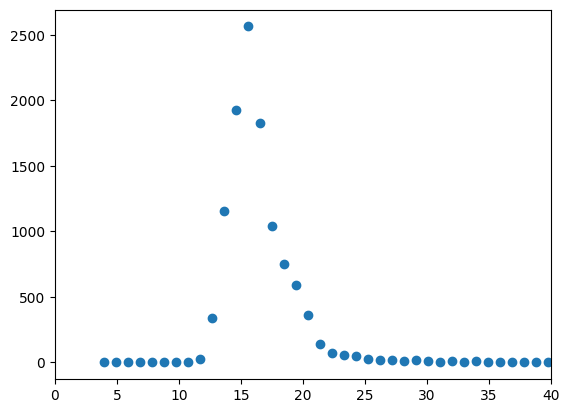

In [326]:
bn = 8200
histo=np.histogram(lifetime_data[5], bins=bn)

plt.scatter(histo[1][:-1], histo[0])
plt.xlim(0, 40)

In [26]:
import numpy as np
np.histogram(delta[delta<tail])

(array([   3,    4, 1520, 6324, 2748,  271,  107,   40,   26,   11]),
 array([ 4. ,  7.5, 11. , 14.5, 18. , 21.5, 25. , 28.5, 32. , 35.5, 39. ]))

In [288]:
from scipy.optimize import curve_fit

n=25
bin_data=np.histogram(delta_plot, bins=n)

decay = lambda x,a,b,c: a * np.exp(-x/b) + c
par_opt, par_cov = curve_fit(decay, bin_data[1][0:n],bin_data[0])
par_err = np.sqrt(np.diag(par_cov))
print(par_opt, par_err)

bin_data_nocu=np.histogram(delta_plot_nocu, bins=n)
par_opt_nocu, par_cov_nocu = curve_fit(decay, bin_data_nocu[1][0:n],bin_data_nocu[0])
par_err_nocu = np.sqrt(np.diag(par_cov_nocu))
print(par_opt_nocu, par_err_nocu)

bin_data[0][12] =1
dy[0][12] = 5

dy_nocu[1][dy_nocu[1]==1]=5
opt_mod3 = decay(bin_data[1][0:25], *par_opt)
r2 = bin_data[0] - opt_mod3
chisq2 = np.sum((r2)**2/(dy[0]**2))
ndf2 = len(bin_data[1][0:25]) - len(par_opt) 
print(chisq2)



[ 2.60816347e+03  2.23396749e+00 -5.17145849e+00] [41.35171975  0.06901605 11.67051568]
[1241.32848403    1.95645819    1.39747277] [30.12110498  0.0924851   8.32612572]
386.37066534100893


In [303]:
print(chi_squared_reduced(fl_count/n_0, opt_mod, dy_fl2[0], dof=None))
print(chi_squared_reduced(bin_data[0], opt_mod3, dy[0], dof=None))
print(chi_squared_reduced(bin_data_nocu[0][0:25],decay(bin_data_nocu[1][0:25], *par_opt_nocu), dy_nocu[1], dof=None))

9.76045349845599
386.37066534100893
423.9785873268319


In [293]:
dy_nocu[1]

array([34.78505426, 29.9165506 , 22.15851981, 17.3781472 , 16.30950643,
       12.80624847,  5.        ,  9.21954446,  6.78232998,  6.164414  ,
        5.65685425,  4.58257569,  5.        ,  2.82842712,  2.64575131,
        2.23606798,  1.41421356,  1.41421356,  5.        ,  2.64575131,
        2.        ,  2.        ,  5.        ,  5.        ,  5.        ])

In [294]:
bin_data_nocu[0][0:25],decay(bin_data_nocu[1][0:25],*par_opt)

(array([1210,  895,  491,  302,  266,  164,    0,   85,   46,   38,   32,
          21,    0,    8,    7,    5,    2,    2,    0,    7,    4,    4,
           1,    0,    1]),
 array([ 2.60299201e+03,  1.78557704e+03,  1.22434510e+03,  8.39006815e+02,
         5.74435991e+02,  3.92783340e+02,  2.68061783e+02,  1.82428752e+02,
         1.23633656e+02,  8.32653166e+01,  5.55486705e+01,  3.65185970e+01,
         2.34526692e+01,  1.44816861e+01,  8.32226593e+00,  4.09324712e+00,
         1.18962963e+00, -8.03975726e-01, -2.17277252e+00, -3.11257972e+00,
        -3.75784538e+00, -4.20088069e+00, -4.50506593e+00, -4.71391758e+00,
        -4.85731380e+00]))

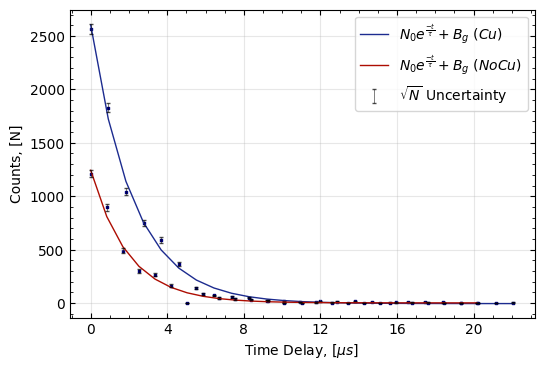

In [278]:
# plots the data:
ff, (ax1) = plt.subplots(1, 1)
ff.set_figwidth(6)
ff.set_figheight(4)

n=25
histogram=np.histogram(delta_plot, bins=n)
ax1.scatter(histogram[1][0:n], histogram[0], c='navy', marker=',',s=2)
dy = [np.sqrt(histogram[0]) for i in range(len(histogram[0]))]
ax1.plot(bin_data[1][0:n], decay(bin_data[1][0:n], *par_opt), c='#1c2b8f', linewidth=1, linestyle='-', label=r'$N_0 e^{\frac{-t}{\tau}} +B_g \ (Cu) $')
ax1.errorbar(histogram[1][0:n], histogram[0], yerr=dy[0],fmt='none', c='k', linewidth=0.5,capsize=1.5, label="$\sqrt{N}$ Uncertainty", alpha=0.7)


hist_nocu = np.histogram(delta_plot_nocu, bins=n)
ax1.scatter(hist_nocu[1][0:n], hist_nocu[0], c='navy', marker=',',s=2)
dy_nocu = [np.sqrt(hist_nocu[0]) for i in range(len(hist_nocu[0]))]
ax1.plot(bin_data_nocu[1][0:n], decay(bin_data_nocu[1][0:n], *par_opt_nocu), c='#ad0d02', linewidth=1, linestyle='-', label=r'$N_0 e^{\frac{-t}{\tau}} +B_g \ (No Cu)$')
ax1.errorbar(hist_nocu[1][0:n], hist_nocu[0], yerr=dy_nocu[0],fmt='none', c='k', linewidth=0.5,capsize=1.5, alpha=0.7)


ax1.legend()
ax1.set_xlabel(r"Time Delay, $[\mu s]$")
ax1.set_ylabel(r"Counts, [N]" )
ax1.xaxis.set_major_locator(MultipleLocator(4))
ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax1.yaxis.set_minor_locator(MultipleLocator(100))
ax1.yaxis.set_major_locator(MultipleLocator(500))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
#ax1.set_ylim(-100,1500)
ax1.grid(True, alpha=0.3)
plt.savefig('/Users/benrasmussen/Desktop/Phys 429A/Experiment 1/Plots/lifetime.png', dpi=600)




In [30]:
# now we need to actually import the data:

base = np.loadtxt('/Users/benrasmussen/Desktop/Phys 429A/Experiment 1/data/base_floor_muon_flux_30m.csv', skiprows=2, delimiter=',', usecols=range(2,8)).T
first = np.loadtxt('/Users/benrasmussen/Desktop/Phys 429A/Experiment 1/data/1st_floor_muon_flux.csv', skiprows=2, delimiter=',', usecols=range(2,7)).T
second = np.loadtxt('/Users/benrasmussen/Desktop/Phys 429A/Experiment 1/data/2nd_floor_muon_flux_30m.csv', skiprows=2, delimiter=',', usecols=range(2,7)).T
third = np.loadtxt('/Users/benrasmussen/Desktop/Phys 429A/Experiment 1/data/3rd_floor_muon_flux_30m.csv', skiprows=2, delimiter=',', usecols=range(2,7)).T
fourth = np.loadtxt('/Users/benrasmussen/Desktop/Phys 429A/Experiment 1/data/4th_floor_muon_flux.csv', skiprows=2, delimiter=',', usecols=range(2,7)).T
outside = np.loadtxt('/Users/benrasmussen/Desktop/Phys 429A/Experiment 1/data/outdoor_muon_flux_30m.csv', skiprows=2, delimiter=',', usecols=range(2,7)).T


In [31]:
base[base==-1] = -1000
first[first==-1] = -1000
second[second==-1] = -1000
third[third==-1] = -1000
fourth[fourth==-1] = -1000
outside[outside==-1] = -1000

base_co = np.array(base[1]) + np.array(base[3])
first_co = np.array(first[1]) + np.array(first[3])
second_co = np.array(second[1]) + np.array(second[3])
third_co = np.array(third[1]) + np.array(third[3])
fourth_co = np.array(fourth[1]) + np.array(fourth[3])
outside_co = np.array(outside[1]) + np.array(outside[3])

In [32]:
base_n = sum(1 for p in range(len(base_co)) if base_co[p]>0)
first_n = sum(1 for p in range(len(first_co)) if first_co[p] >0)
second_n = sum(1 for p in range(len(second_co)) if second_co[p] >0)
third_n = sum(1 for p in range(len(third_co)) if third_co[p] >0)
fourth_n = sum(1 for p in range(len(fourth_co)) if fourth_co[p] >0)
outside_n = sum(1 for p in range(len(outside_co)) if outside_co[p] >0)

floor_count = [fourth_n/2,third_n,second_n,first_n/2,base_n]

In [33]:
hr = 60 *60 # s
half_hr = hr/2
floor_count = np.array([fourth_n/2,third_n,second_n,first_n/2,base_n])
#floor_count = [15820,17348,18749,21789,22000]
fl_cr = [floor_count[i]/hr for i in range(len(floor_count))]
dy_floor = [np.sqrt(floor_count[i]) for i in range(len(floor_count))]
floors = ['4th', '3rd', '2nd', '1st', 'base']
floor_num = np.array([4,3,2,1,0])

In [34]:
from scipy.optimize import curve_fit
from scipy import stats
n=25

linear = lambda x,m,b: m*x+b
par_opt_l, par_cov_l = curve_fit(linear, floor_num, floor_count)
par_err_l = np.sqrt(np.diag(par_cov_l))
print(par_opt_l, par_err_l)

# try again:

floor_reg = stats.linregress(floor_num, floor_count)


[  717.20000453 13201.29999094] [154.63477062 378.77628699]


$$ \delta m = t_{\alpha/2,N} \frac{s_\epsilon}{ s_{xx}}$$

With a standard error of :

$$ s_{\epsilon}=\left(\frac{\Sigma (y_i- \hat{y_i})^2}{N-2}\right)^{1/2}$$

We already know $s_x$ and $\bar{x}$ and $\hat{y}$ is simply the fit evaluated at the specific index of x.

In [35]:
# To find a confidence interval in this slope, we must look to the student-t distribution.
# Since we have 5 degrees of freedom in the regression we get:

t_alpha = sp.stats.t.ppf(1-0.05/2, len(floor_count)-2)

print(f"The factor of t_a applied to the slope is: {t_alpha:0.4f}")

# this value times the standard error from above will give deviation from mean slope:

err_factor = t_alpha * floor_reg.stderr
upper_slope = floor_reg.slope + err_factor
lower_slope = floor_reg.slope - err_factor

print()
print(f"Thus, the range of slopes within a 95% confidence is: {lower_slope:0.4f} < {floor_reg.slope:0.4f} < {upper_slope:0.4f}")

fl_num = np.array([5,4,3,2,1,0])

The factor of t_a applied to the slope is: 3.1824

Thus, the range of slopes within a 95% confidence is: 225.0831 < 717.2000 < 1209.3169


In [36]:
upper_fit = upper_slope * fl_num + floor_reg.intercept
lower_fit = lower_slope * fl_num + floor_reg.intercept

center = [np.mean(floor_num), np.mean(floor_count)]
differences = [(upper_slope * center[0] + floor_reg.intercept)-center[1]
               ,(lower_slope*center[0] + floor_reg.intercept) -center[1]]

upper_fit = upper_slope * fl_num + floor_reg.intercept - differences[0]
lower_fit = lower_slope * fl_num + floor_reg.intercept - differences[1]

/var/folders/_4/c4v1yztx1fsb4299y_1flv100000gn/T/ipykernel_20516/3207088839.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['ben',r'$0^{th}$', r'$1^{st}$', r'$2^{nd}$', r'$3^{rd}$', r'$4^{th}$', r'$Outside$'])


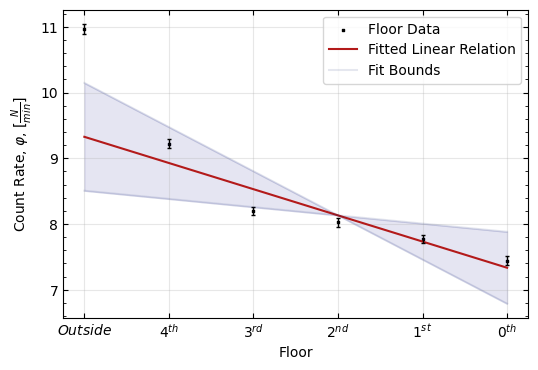

In [37]:
# plots the data:
ff, (ax1) = plt.subplots(1, 1)
ff.set_figwidth(6)
ff.set_figheight(4)

fl_num = np.array([5,4,3,2,1,0])


factor =1800

ax1.scatter(floor_num, floor_count/factor, label='Floor Data', c='k', marker=',', s=2)

ax1.plot(fl_num, (floor_reg.slope*(fl_num) +floor_reg.intercept)/factor, '-', color=[0.7,0.1,0.1], label="Fitted Linear Relation")

ax1.errorbar(floor_num, floor_count/factor, yerr=np.array(dy_floor)/factor,fmt='none',c='k', linewidth=1,capsize=1.5)

ax1.fill_between(fl_num, lower_fit/factor, upper_fit/factor, where=(upper_fit/factor > lower_fit/factor), color='navy', alpha=0.1,
                 interpolate=True)
ax1.fill_between(fl_num, lower_fit/factor, upper_fit/factor, where=(upper_fit/factor < lower_fit/factor), color='navy', alpha=0.1,
                 interpolate=True)

ax1.scatter(5, outside_n/factor, c='k', marker=',', s=2)
ax1.errorbar(5, outside_n/factor, yerr=np.sqrt(outside_n)/factor,fmt='none',c='k', linewidth=1,capsize=1.5)

ax1.plot(fl_num, upper_fit/factor, '-',color=[0.,0.1,0.4],alpha=0.1, label="Fit Bounds")
ax1.plot(fl_num, lower_fit/factor, '-',color=[0.,0.1,0.4], alpha=0.1)
ax1.legend()
ax1.set_xlabel(r"Floor")
ax1.set_ylabel(r"Count Rate, $\varphi$, [$\frac{N}{min}$]" )
ax1.xaxis.set_major_locator(MultipleLocator(1))
#ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax1.yaxis.set_minor_locator(MultipleLocator(0.2))
ax1.yaxis.set_major_locator(MultipleLocator(1))
ax1.set_xticklabels(['ben',r'$0^{th}$', r'$1^{st}$', r'$2^{nd}$', r'$3^{rd}$', r'$4^{th}$', r'$Outside$'])
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
#ax1.set_ylim(6,11.5)
ax1.invert_xaxis()
ax1.grid(True, alpha=0.3)

plt.savefig('/Users/benrasmussen/Desktop/Phys 429A/Experiment 1/Plots/linear_fit.png', dpi=600)


In [38]:
# estimated depth of concrete by floor:
# going to assume each floor has 6 inches of concrete, the air has little to no effect
# and that only concrete acts as an attenuator
in_cm = 2.54

concrete = np.array([0, 6, 12,18,24,30]) * in_cm / 100
fl_count = np.array([outside_n,fourth_n/2,third_n,second_n,first_n/2,base_n])

dy_fl = [np.sqrt(fl_count[i])/fl_count[i] for i in range(len(fl_count))]

In [298]:
def monoExp(x, a, b, c):
    return a * np.exp(-x / b) + c


p0 = (7000, 0.2, 13500) # start with values near those we expect
params, cv = sp.optimize.curve_fit(monoExp, concrete[0:6], fl_count[0:6], p0=p0, sigma=np.array(dy_fl2), absolute_sigma=True)
a,b,c = params
err_con = np.sqrt(np.diag(cv))

print(params, err_con)


opt_mod = monoExp(concrete, a,b,c)/n_0
r = fl_count/n_0 - opt_mod
chisq = np.sum((r/dy_fl2)**2)
ndf = len(concrete) - len(params) 
print(chisq,ndf)

def chi_squared_reduced(data, model, sigma, dof=None):

    sq_residual = (data - model)**2
    chi_sq = np.sum(sq_residual / sigma**2)
    if dof is None:
        return chi_sq
    else:
        nu = len(data) - dof
        print(nu)
        return chi_sq / nu

[6.31387243e+03 2.18785917e-01 1.34196393e+04] [8.45584470e-03 7.67147149e-07 6.33532000e-03]
13.575621043720819 3


In [257]:
print(chi_squared_reduced(fl_count/n_0, opt_mod, dy_fl2[0], dof=None))

9.76045349845599


In [243]:
chi, p_value = stats.chisquare(fl_count, opt_mod2) 

chi, p_value
#print(stats.chi2.ppf(1-0.05, df=2)) 


ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
19743.999999999996

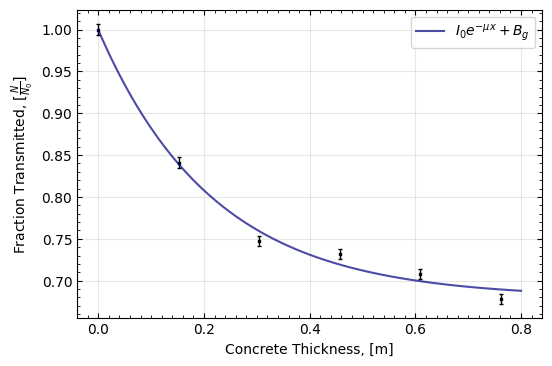

In [304]:
# plots the data:
ff, (ax1) = plt.subplots(1, 1)
ff.set_figwidth(6)
ff.set_figheight(4)

con_fit = np.linspace(0,0.8, 100)

n_0 = max(fl_count)

fitted = monoExp(con_fit, a,b,c)/n_0

ax1.scatter(concrete, fl_count/n_0, c='k', marker=',', s=2)
ax1.plot(con_fit, monoExp(con_fit, a,b,c)/n_0, label=r"$I_0 e^{-\mu x}+B_g$", c='navy', alpha=0.7,zorder=30)

dy_fl2 = [dy_fl[i]*fl_count[i]/n_0 for i in range(len(dy_fl))]

ax1.errorbar(concrete, fl_count/n_0, yerr=np.array(dy_fl2),fmt='none',c='k', linewidth=1,capsize=1.5)

ax1.legend()
ax1.set_xlabel(r"Concrete Thickness, [m]")
ax1.set_ylabel(r"Fraction Transmitted, $[\frac{N}{N_0}]$" )
ax1.xaxis.set_major_locator(MultipleLocator(0.2))
ax1.xaxis.set_minor_locator(MultipleLocator(0.02))
ax1.yaxis.set_minor_locator(MultipleLocator(0.01))
ax1.yaxis.set_major_locator(MultipleLocator(0.05))
#ax1.set_xticklabels(['ben',r'$0^{th}$', r'$1^{st}$', r'$2^{nd}$', r'$3^{rd}$', r'$4^{th}$', r'$Outside$'])
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.set_ylim()
ax1.grid(True, alpha=0.3)
asdf=chisq/ndf

#ax1.text(0.55,0.87,r'$\chi^2_{\nu}='+f'{asdf:0.3f}$')
#ax1.text(0.556,0.82,r'$p='+f'{0.004:0.3f}$')


plt.savefig('/Users/benrasmussen/Desktop/Phys 429A/Experiment 1/Plots/exponential_fit.png', dpi=600)


In [97]:
dy_fl2

[0.007116581559779005,
 0.006524951431086407,
 0.006151736877082679,
 0.006086765940774319,
 0.005989272833894182,
 0.00586201115604835]

In [44]:
attenuation = (1-fl_count[5]/fl_count[0])/concrete[-1]

print(f"The Attenuation percentage of muons from no coverage to the basement is: {attenuation:0.5f}")

print(fl_count[5]/fl_count[0], fl_count[5], fl_count[0])

The Attenuation percentage of muons from no coverage to the basement is: 0.42191
0.6785008863003292 13397.0 19745.0


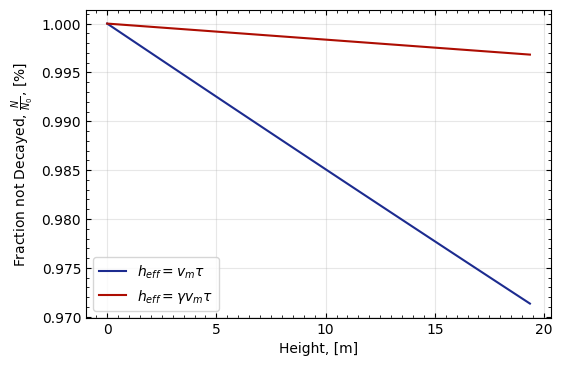

In [45]:
# now we want to estimate the lifetime decay effect on the muons:
N0 = 42000
v_muons = 0.994 * 299792458 # m/s
tau = par_opt[1]*10**(-6)

height = (np.linspace(183.5, 247, 100) - 183.5) *12 *2.54 / 100  # m
decay_h = N0 * np.exp(-height/(v_muons * tau))

decay_hr = N0 * np.exp(-height/(v_muons * tau*((1-((v_muons)/(299792458))**2)**-0.5)))# * ((1-((v_muons)/(299792458))**2)**0.5)

# plots the data:
ff, (ax1) = plt.subplots(1, 1)
ff.set_figwidth(6)
ff.set_figheight(4)

ax1.plot(height, decay_h/N0, c='#1c2b8f',label=r'$h_{eff} = v_{m} {\tau} $')
ax1.plot(height, decay_hr/N0,c='#ad0d02', label=r'$h_{eff} = \gamma v_{m} {\tau} $')


ax1.legend()
ax1.set_xlabel(r"Height, [m]")
ax1.set_ylabel(r"Fraction not Decayed, $\frac{N}{N_0}$, [%]" )
ax1.xaxis.set_major_locator(MultipleLocator(5))
ax1.xaxis.set_minor_locator(MultipleLocator(0.5))
ax1.yaxis.set_minor_locator(MultipleLocator(0.001))
ax1.yaxis.set_major_locator(MultipleLocator(0.005))
#ax1.set_xticklabels(['ben',r'$0^{th}$', r'$1^{st}$', r'$2^{nd}$', r'$3^{rd}$', r'$4^{th}$', r'$Outside$'])
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.set_ylim()
ax1.grid(True, alpha=0.3)

plt.savefig('/Users/benrasmussen/Desktop/Phys 429A/Experiment 1/Plots/decay_corrections.png', dpi=600)


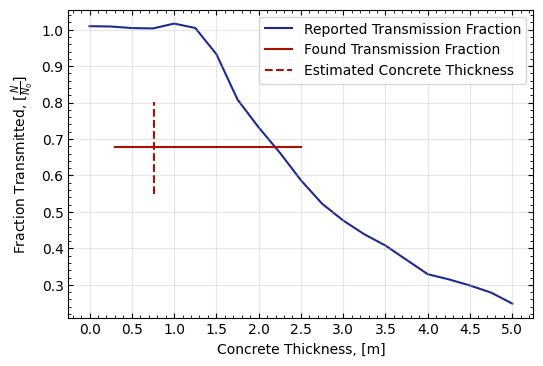

In [46]:
paper_data = [1.00947E+00,1.00860E+00,1.00431E+00,1.00332E+00,1.01662E+00,1.00457E+00,9.32776E-01,8.08205E-01,7.31928E-01,6.62702E-01,5.86889E-01,5.22605E-01,4.76525E-01,4.38739E-01,4.07817E-01,3.68450E-01,3.29201E-01,3.15072E-01,2.98276E-01,2.78712E-01,2.48661E-01]
paper_thick = np.linspace(0, 5, 21)
 
    
# plots the data:
ff, (ax1) = plt.subplots(1, 1)
ff.set_figwidth(6)
ff.set_figheight(4)

ax1.plot(paper_thick, paper_data, label=r"Reported Transmission Fraction", c='#1c2b8f', zorder=0)
ax1.axhline(fl_count[5]/fl_count[0],0.1, 0.5, label="Found Transmission Fraction",c='#ad0d02' )

ax1.axvline(concrete[-1], 0.4, 0.7, label="Estimated Concrete Thickness",c='#ad0d02', linestyle='--')

ax1.legend()
ax1.set_xlabel(r"Concrete Thickness, [m]")
ax1.set_ylabel(r"Fraction Transmitted, $[\frac{N}{N_0}]$" )
ax1.xaxis.set_major_locator(MultipleLocator(0.5))
ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
ax1.yaxis.set_minor_locator(MultipleLocator(0.02))
ax1.yaxis.set_major_locator(MultipleLocator(0.1))
#ax1.set_xticklabels(['ben',r'$0^{th}$', r'$1^{st}$', r'$2^{nd}$', r'$3^{rd}$', r'$4^{th}$', r'$Outside$'])
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.set_ylim()
ax1.grid(True, alpha=0.3)
plt.savefig('/Users/benrasmussen/Desktop/Phys 429A/Experiment 1/Plots/reported_trans_factor.png', dpi=600)
